# Segmenting and Clustering Neighborhoods in Toronto

# Section 1

In [1]:
#import Beautiful Soup for web scrape
from bs4 import BeautifulSoup

#imports for use
import pandas as pd
import requests

## Wikipedia Scrape using Beautiful Soup

In [2]:
#scrape wikipedia page List of postal codes of Canada:M  
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

#use lxml HTML parser as recomeded by Beautiful Soup documentation
#parse HTML as a string
soup = BeautifulSoup(res.content,"lxml")

#grab first table only
table = soup.find_all("table")[0]

#create dataframe as torontoNBS
torontoNBS = pd.read_html(str(table))[0]
Postcode = torontoNBS["Postcode"].tolist()
Borough = torontoNBS["Borough"].tolist()
Neighbourhood = torontoNBS["Neighbourhood"].tolist()

#rename columns to match course requirements PostalCode, Borough, and Neighborhood
torontoNBS = torontoNBS.rename(columns = {"Postcode":"PostalCode", "Neighbourhood":"Neighborhood"})

## Cleaning

In [3]:
#cleanup
#create a new dataframe for ease
torontoNBS_clean = torontoNBS

#ignore rows where Borough is Not assigned
#create as copy to avoid future error in cleaning next step
torontoNBS_clean = torontoNBS_clean[torontoNBS_clean.Borough.str.contains("Not assigned") == False].copy()

#assign missing Neighborhoods as Borough name
torontoNBS_clean.loc[torontoNBS_clean.Neighborhood == "Not assigned", "Neighborhood"] = torontoNBS_clean.Borough

#group within dataframe
torontoNBS_clean = torontoNBS_clean.groupby(["PostalCode", "Borough"])["Neighborhood"].apply(", ".join).reset_index()

## Result 

In [4]:
#show clean dataframe
torontoNBS_clean

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [5]:
print ("Number of rows within dataframe is:", torontoNBS_clean.shape[0])

Number of rows within dataframe is: 103


# Section 2
# Geospatial Data

After attepmts to use Geocoder package without great success (seems to hang all the time) opted for csv file

In [6]:
#collect csv file
path="http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv"
geoCord = pd.read_csv(path)
geoCord.head()

#note Latitude and Longitude are shortened in display to 6 decmial places, actual float contains full 7 places.  
#not deemed necessary to change display output as this matches course work example

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
#concatenate the two dataframes and drop additional postcode column
geoData = pd.concat([torontoNBS_clean, geoCord], axis=1, sort=False).drop(["Postal Code"], axis=1)

In [8]:
geoData.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


# Section 3
# Exploring and Clustering the Neighborhoods

## Installs and imports

In [9]:
#install necessary packages
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

#imports
#converting an address into latitude and longitude values
from geopy.geocoders import Nominatim 

#library to handle requests
import requests 

#matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

#map rendering library
import folium

import numpy as np

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



## Use geopy to find latitude and longitude of Toronto

In [10]:
address = 'Toronto, Canada'

#define instance of geocoder as toronto_explorer
geolocator = Nominatim(user_agent="toronto_explorer") 
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


## A general map of Toronto area 
#### Neighborhoods shown followed by Borough in popup

In [11]:
#map of Toronto using latitude and longitude values
#zoom 10 selected to show neighborhoods ion relation to outlying towns/cities
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

#add markers to map
for lat, lng, borough, neighborhood in zip(geoData['Latitude'], geoData['Longitude'], geoData['Borough'], geoData['Neighborhood']):
    label = '{} - {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

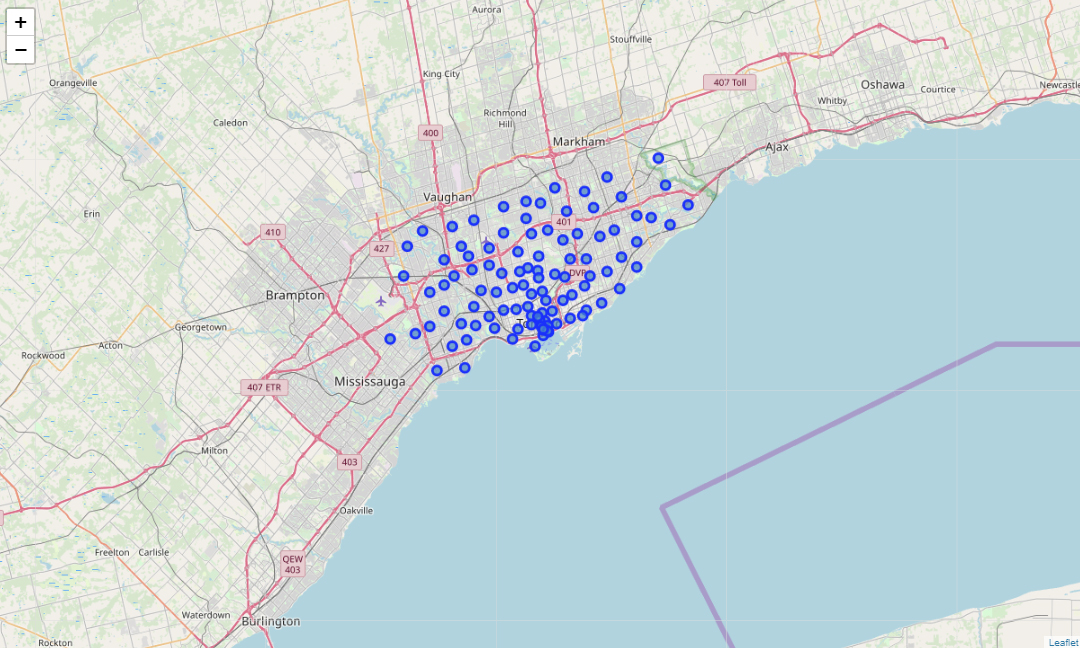

Map shown as image due to github technical difficulties

# Off to Scarborough

From the comfort of downtown Toronto we have been sent for some work in Scarborough.  Not knowing anything about Scarborough; except that it has a train station we will arrive at, its best to do some exploratory work and find which area to stay

## Create a new dataframe of Scarborough only

In [12]:
#create new dataframe for Scarborough
scarborough_geoData = geoData[geoData["Borough"] == "Scarborough"].reset_index(drop=True)
scarborough_geoData

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Map of Scarborough 

In [13]:
#use Scarborough Centre railway station as central point
address = 'Scarborough Centre station, Toronto'

#define instance of geocoder as scarborough_explorer
geolocator = Nominatim(user_agent="scarborough_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Scarborough Centre are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Scarborough Centre are 43.774427, -79.2577887753992.


In [33]:
#map of Scarborough using latitude and longitude values
#zoom 12 selected to show greater detail
map_scarborough = folium.Map(location=[latitude, longitude], zoom_start=12)

#add markers to map
for lat, lng, borough, neighborhood in zip(scarborough_geoData['Latitude'], scarborough_geoData['Longitude'], scarborough_geoData['Borough'], scarborough_geoData['Neighborhood']):
    label = '{} - {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarborough)  
    
map_scarborough

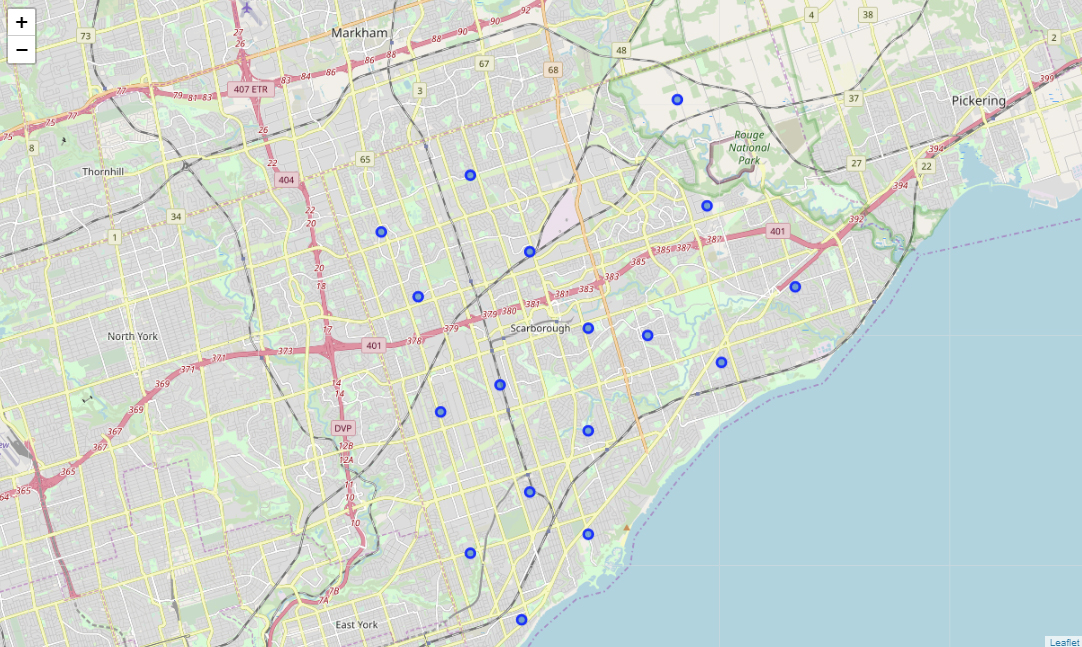

Map shown as image due to github technical difficulties

## Exploring the Neighborhoods

In [16]:
#Foursquare required details
CLIENT_ID = 'S2YDPIQFORGXOCZHCHFOSBZ3S0ZQZSDWDVASWLKILS5LQ4M0' 
CLIENT_SECRET = 'TUHYBUMFK1BRDAH3PW1IAQVATDSFZB4JLHODA2UYN3VVW55R'
VERSION = '20180605'

In [15]:
#function to select 100 venues within 500m
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
#run function to create our Scarborough venues
scarborough_venues = getNearbyVenues(names=scarborough_geoData['Neighborhood'],
                                   latitudes=scarborough_geoData['Latitude'],
                                   longitudes=scarborough_geoData['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge


In [18]:
#display
scarborough_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Marina Spa,43.766000,-79.191000,Spa


In [19]:
scarborough_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3,3,3,3,3,3
"Birch Cliff, Cliffside West",4,4,4,4,4,4
Cedarbrae,7,7,7,7,7,7
"Clairlea, Golden Mile, Oakridge",10,10,10,10,10,10
"Clarks Corners, Sullivan, Tam O'Shanter",12,12,12,12,12,12
"Cliffcrest, Cliffside, Scarborough Village West",3,3,3,3,3,3
"Dorset Park, Scarborough Town Centre, Wexford Heights",6,6,6,6,6,6
"East Birchmount Park, Ionview, Kennedy Park",5,5,5,5,5,5


We can already note that there is either not much at Scarborough or little has been entered into Foursquare for these areas.

## Analyze each neighborhood

In [20]:
#one hot encoding
scarborough_onehot = pd.get_dummies(scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighborhood column back to dataframe
scarborough_onehot['Neighborhood'] = scarborough_venues['Neighborhood'] 

#move neighborhood column to the first column
fixed_columns = [scarborough_onehot.columns[-1]] + list(scarborough_onehot.columns[:-1])
scarborough_onehot = scarborough_onehot[fixed_columns]

scarborough_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bus Line,...,Playground,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Spa,Thai Restaurant,Vietnamese Restaurant
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#group rows by neighborhood using the mean of the frequency of occurrence of each category
scarborough_grouped = scarborough_onehot.groupby('Neighborhood').mean().reset_index()
scarborough_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bus Line,...,Playground,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Spa,Thai Restaurant,Vietnamese Restaurant
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.200000,0.0,...,0.000000,0.000,0.200000,0.000000,0.00,0.000000,0.0,0.000,0.000000,0.000000
1,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.333333,0.000,0.000000,0.000000,0.00,0.000000,0.0,0.000,0.000000,0.000000
2,"Birch Cliff, Cliffside West",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000,0.000000,0.000000,0.25,0.000000,0.0,0.000,0.000000,0.000000
3,Cedarbrae,0.000000,0.000000,0.142857,0.000000,0.142857,0.142857,0.0,0.000000,0.0,...,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.0,0.000,0.142857,0.000000
4,"Clairlea, Golden Mile, Oakridge",0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.000000,0.2,...,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.1,0.000,0.000000,0.000000
5,"Clarks Corners, Sullivan, Tam O'Shanter",0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.0,0.000000,0.0,...,0.000000,0.000,0.000000,0.083333,0.00,0.000000,0.0,0.000,0.083333,0.000000
6,"Cliffcrest, Cliffside, Scarborough Village West",0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.0,0.000,0.000000,0.000000
7,"Dorset Park, Scarborough Town Centre, Wexford ...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.0,0.000,0.000000,0.166667
8,"East Birchmount Park, Ionview, Kennedy Park",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.0,0.000,0.000000,0.000000
9,"Guildwood, Morningside, West Hill",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.125000,0.0,...,0.000000,0.125,0.000000,0.000000,0.00,0.000000,0.0,0.125,0.000000,0.000000


In [22]:
#print each neighborhood top 10 venues
num_top_venues = 10

for hood in scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = scarborough_grouped[scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant   0.2
1                     Lounge   0.2
2             Breakfast Spot   0.2
3             Sandwich Place   0.2
4         Chinese Restaurant   0.2
5                  Pet Store   0.0
6         Light Rail Station   0.0
7             Medical Center   0.0
8              Metro Station   0.0
9         Mexican Restaurant   0.0


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                       venue  freq
0                       Park  0.33
1                 Playground  0.33
2           Asian Restaurant  0.33
3        American Restaurant  0.00
4  Latin American Restaurant  0.00
5         Light Rail Station  0.00
6                     Lounge  0.00
7             Medical Center  0.00
8              Metro Station  0.00
9         Mexican Restaurant  0.00


----Birch Cliff, Cliffside West----
                   venue  freq
0           Skating Rink  0.25
1  General Entertainment  0.25
2             

In [23]:
#function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
#new dataframe displaying the top 10 venues in neighborhoods
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

#create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scarborough_grouped['Neighborhood']

for ind in np.arange(scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Lounge,Sandwich Place,Breakfast Spot,Chinese Restaurant,Vietnamese Restaurant,Coffee Shop,Gym,Grocery Store,General Entertainment
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Asian Restaurant,Playground,Chinese Restaurant,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant
2,"Birch Cliff, Cliffside West",Skating Rink,General Entertainment,College Stadium,Café,Vietnamese Restaurant,Chinese Restaurant,Hakka Restaurant,Gym,Grocery Store,Fried Chicken Joint
3,Cedarbrae,Athletics & Sports,Hakka Restaurant,Bakery,Bank,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Vietnamese Restaurant,Department Store,Hobby Shop
4,"Clairlea, Golden Mile, Oakridge",Bakery,Bus Line,Intersection,Fast Food Restaurant,Metro Station,Bus Station,Park,Soccer Field,Bank,Bar


## Clustering Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters

In [25]:
#set number of clusters
kclusters = 5

scarborough_grouped_clustering = scarborough_grouped.drop('Neighborhood', 1)

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scarborough_grouped_clustering)

#check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [26]:
#add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

scarborough_merged = scarborough_geoData

#merge scarborough_grouped with scarborough_data to add latitude/longitude for each neighborhood
scarborough_merged = scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#cast Cluster labels to integers
scarborough_merged['Cluster Labels'] = scarborough_merged['Cluster Labels'].fillna(0).astype(np.int64)

scarborough_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0,Fast Food Restaurant,Vietnamese Restaurant,Thai Restaurant,Hobby Shop,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint,Electronics Store
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,3,Bar,Vietnamese Restaurant,Coffee Shop,Hobby Shop,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,Intersection,Spa,Electronics Store,Rental Car Location,Pizza Place,Breakfast Spot,Medical Center,Mexican Restaurant,Chinese Restaurant,Grocery Store
3,M1G,Scarborough,Woburn,43.770992,-79.216917,4,Coffee Shop,Korean Restaurant,Vietnamese Restaurant,Indian Restaurant,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1,Athletics & Sports,Hakka Restaurant,Bakery,Bank,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Vietnamese Restaurant,Department Store,Hobby Shop


## Cluster map of Scarborough

In [27]:
#create map of clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

#set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(scarborough_merged['Latitude'], scarborough_merged['Longitude'], scarborough_merged['Neighborhood'], scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

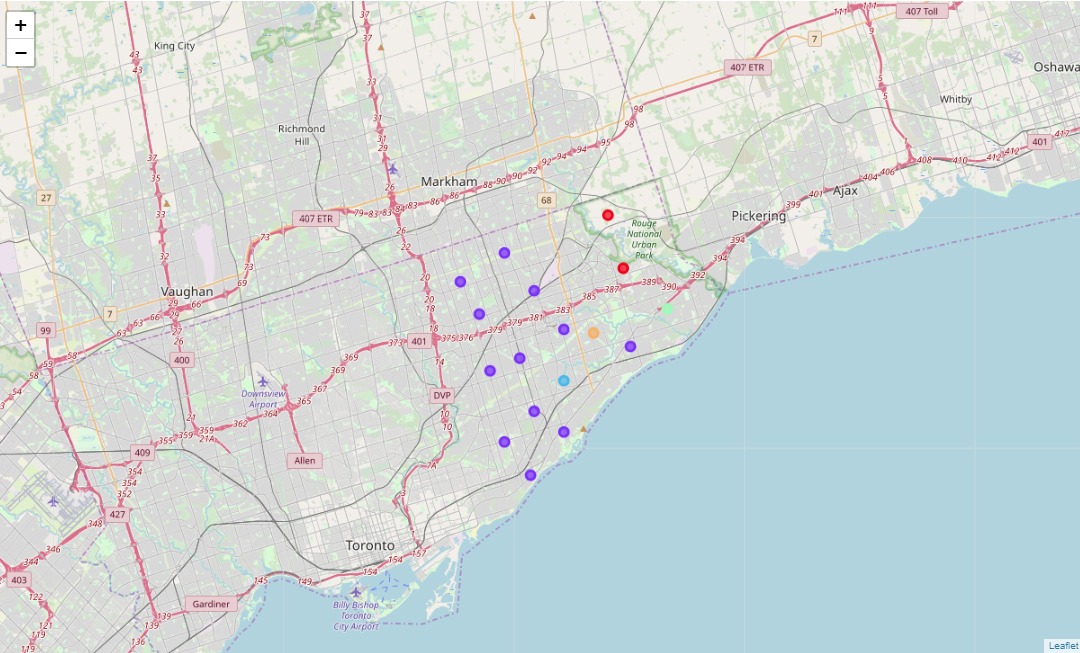

Map shown as image due to github technical difficulties

# Examine Clusters

## Cluster 0 - North

The furthest north of our clusters and a little distance from our central point.  Out here there is either no venues or very little mobile signal to tell anyone you are actually here!

In [28]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 0, scarborough_merged.columns[[1] + list(range(5,scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,0,Fast Food Restaurant,Vietnamese Restaurant,Thai Restaurant,Hobby Shop,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint,Electronics Store
16,Scarborough,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cluster 1 - Central

This cluster is the largest by far and is closest to downtown.  It is little suprise that this contains the most number of venues and would offer most delights of the city.

In [29]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 1, scarborough_merged.columns[[1] + list(range(5,scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Scarborough,1,Intersection,Spa,Electronics Store,Rental Car Location,Pizza Place,Breakfast Spot,Medical Center,Mexican Restaurant,Chinese Restaurant,Grocery Store
4,Scarborough,1,Athletics & Sports,Hakka Restaurant,Bakery,Bank,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Vietnamese Restaurant,Department Store,Hobby Shop
6,Scarborough,1,Chinese Restaurant,Coffee Shop,Hobby Shop,Bus Station,Department Store,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint
7,Scarborough,1,Bakery,Bus Line,Intersection,Fast Food Restaurant,Metro Station,Bus Station,Park,Soccer Field,Bank,Bar
8,Scarborough,1,American Restaurant,Motel,Movie Theater,Coffee Shop,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant
9,Scarborough,1,Skating Rink,General Entertainment,College Stadium,Café,Vietnamese Restaurant,Chinese Restaurant,Hakka Restaurant,Gym,Grocery Store,Fried Chicken Joint
10,Scarborough,1,Indian Restaurant,Vietnamese Restaurant,Light Rail Station,Pet Store,Chinese Restaurant,Coffee Shop,Hakka Restaurant,Gym,Grocery Store,General Entertainment
11,Scarborough,1,Middle Eastern Restaurant,Smoke Shop,Auto Garage,Sandwich Place,Breakfast Spot,Vietnamese Restaurant,Coffee Shop,Gym,Grocery Store,General Entertainment
12,Scarborough,1,Latin American Restaurant,Lounge,Sandwich Place,Breakfast Spot,Chinese Restaurant,Vietnamese Restaurant,Coffee Shop,Gym,Grocery Store,General Entertainment
13,Scarborough,1,Pizza Place,Pharmacy,Noodle House,Chinese Restaurant,Thai Restaurant,Italian Restaurant,Shopping Mall,Bank,Fried Chicken Joint,Fast Food Restaurant


## Cluster 2 - Village Life

With a playground as its most comon foursquare venue doesnt it just sound a great place.  Welcome to the village.

In [30]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 2, scarborough_merged.columns[[1] + list(range(5,scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,2,Playground,Vietnamese Restaurant,Chinese Restaurant,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant,Electronics Store


## Cluster 3

Small area containing all you can ask for.  Be careful not to fall in the docks after a beer or two..

In [31]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 3, scarborough_merged.columns[[1] + list(range(5,scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,3,Bar,Vietnamese Restaurant,Coffee Shop,Hobby Shop,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant


## Cluster 4

Just isolated from the main largest cluster, whilst being fairly close by.  Has good selection of resturants although possibly not as easy to travel from central

In [32]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 4, scarborough_merged.columns[[1] + list(range(5,scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Scarborough,4,Coffee Shop,Korean Restaurant,Vietnamese Restaurant,Indian Restaurant,Hakka Restaurant,Gym,Grocery Store,General Entertainment,Fried Chicken Joint,Fast Food Restaurant


## Conclusion / Recommendation

As a downtown city dweller it is recommeded to stay with in cluster 1, to feel 'at home' during your stay.  It offers the flexibilty of bus routes and train links to the other neighborhoods where a wide variety of cuisines and other venus can be found.